# Fredkin spin chain simulation

## Running simulation

In [1]:
push!(LOAD_PATH, ".")

3-element Array{Any,1}:
 "/Applications/JuliaPro-0.6.0.1.app/Contents/Resources/julia/Contents/Resources/julia/local/share/julia/site/v0.6"
 "/Applications/JuliaPro-0.6.0.1.app/Contents/Resources/julia/Contents/Resources/julia/share/julia/site/v0.6"      
 "."                                                                                                               

In [2]:
addprocs(8)

8-element Array{Int64,1}:
 2
 3
 4
 5
 6
 7
 8
 9

In [3]:
@everywhere using FredkinChain


Use "abstract type ApproxFit end" instead.

Use "abstract type LeastSquares<:ApproxFit end" instead.

Use "LinearFit{T}(...) where T" instead.

Use "LogFit{T}(...) where T" instead.

Use "PowerFit{T}(...) where T" instead.

Use "ExpFit{T}(...) where T" instead.

Use "abstract type ApproxFit end" instead.

Use "abstract type LeastSquares<:ApproxFit end" instead.

Use "abstract type ApproxFit end" instead.

Use "abstract type LeastSquares<:ApproxFit end" instead.

Use "abstract type ApproxFit end" instead.

Use "abstract type LeastSquares<:ApproxFit end" instead.

Use "abstract type ApproxFit end" instead.

Use "abstract type LeastSquares<:ApproxFit end" instead.

Use "abstract type ApproxFit end" instead.

Use "abstract type LeastSquares<:ApproxFit end" instead.

Use "abstract type ApproxFit end" instead.

Use "abstract type ApproxFit end" instead.

Use "abstract type LeastSquares<:ApproxFit end" instead.

Use "abstract type LeastSquares<:ApproxFit end" instead.

Use "abstract type App

In [61]:
open_spectra_dyck = find_power_spectra(16, 10, 2^23, init=:dyck_init, update=:open_update);

	From worker 2:	running simulation: 1
	From worker 3:	running simulation: 1
	From worker 4:	running simulation: 1
	From worker 5:	running simulation: 1
	From worker 6:	running simulation: 1
	From worker 7:	running simulation: 1
	From worker 8:	running simulation: 1
	From worker 9:	running simulation: 1
	From worker 5:	running simulation: 2
	From worker 3:	running simulation: 2
	From worker 6:	running simulation: 2
	From worker 9:	running simulation: 2
	From worker 8:	running simulation: 2
	From worker 7:	running simulation: 2
	From worker 2:	running simulation: 2
	From worker 4:	running simulation: 2


In [62]:
using JLD

@save "open_spectra_dyck.jld" open_spectra_dyck

## Data fitting

In [63]:
using JLD

@load "open_spectra_dyck.jld"

  likely near In[63]:3
in jldatatype at /Applications/JuliaPro-0.6.0.1.app/Contents/Resources/pkgs-0.6.0.1/v0.6/JLD/src/jld_types.jl
  likely near In[63]:3
in jldatatype at /Applications/JuliaPro-0.6.0.1.app/Contents/Resources/pkgs-0.6.0.1/v0.6/JLD/src/jld_types.jl


1-element Array{Symbol,1}:
 :open_spectra_dyck

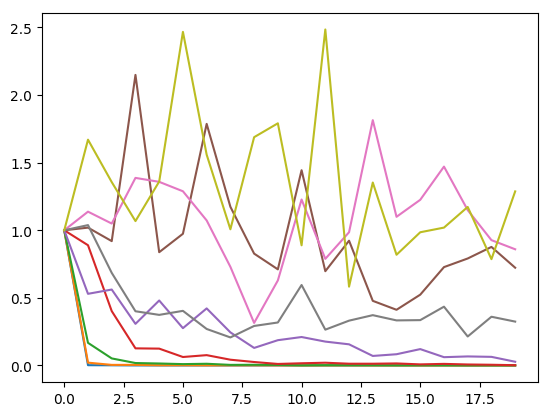

In [118]:
using PyPlot
pygui(false)

for power_spec in open_spectra[1:9]
    plot(power_spec[1:20]/power_spec[1])
end

In [42]:
?find_power_spectra

search: find_power_spectra



```
find_power_spectrafind_power_spectra(N_sim::Int, size_exp::Int, time_steps::Int; init::Symbol=:dyck_init, update::Symbol=:open_update, ncores::Int=8)
```

Finds the average power spectra over `N_sim` simulations run on `ncores` cores, for a chain of length `2^(size_exp)`.

`init` describes the initialization method, which can be `rand_init` for random configurations or `dyck_init` for configurations drawn uniformly from the Dyck paths.

`update` describes the update method, which can be `open_update` or `periodic_update` for open or periodic boundary conditions respectively.


In [92]:
using LsqFit

# a two-parameter lorenztian model
# x: array of independent variables
# p: array of model parameters
@. model(x, p) = p[1] / (1 + x^2 * p[2]^2) + p[3]

# some example data
# xdata: independent variables
# ydata: dependent variable
xdata = linspace(0, 511, 512)
ydata = open_spectra_dyck[2][1:512]
p0 = [1., 1.,1.]

fit = curve_fit(model, xdata, ydata, p0)
# fit is a composite type (LsqFitResult), with some interesting values:
#	fit.dof: degrees of freedom
#	fit.param: best fit parameters
#	fit.resid: residuals = vector of residuals
#	fit.jacobian: estimated Jacobian at solution

LsqFit.LsqFitResult{Float64,1}(509, [7.12384e7, 1.49169, -2894.27], [4268.35, -50680.2, 66671.8, -33523.2, -2.3462e5, 4.3142e5, 2.03148e5, -88156.7, 1.54848e5, 124372.0  …  -2868.14, -2845.99, -2868.87, -2864.96, -2853.48, -2869.24, -2906.79, -2902.64, -2884.74, -2903.94], [1.0 0.0 1.0; 0.310065 -2.04328e7 1.0; … ; 1.72784e-6 -165.032 1.0; 1.72108e-6 -164.387 1.0], true, Float64[])

In [84]:
abs(fit.param[2])

1.4918984385255971

In [106]:
decay_times = [abs(curve_fit(model, x, open_spectra[p][1:512], p0).param[2]) for p in 1:9]

9-element Array{Float64,1}:
 20.6542   
  1.07291e7
  2.2196   
  0.629352 
  1.28179e6
  3.62843e6
  0.0183853
  0.0764805
  3.94941e5

In [113]:
x = [linspace(0, 511, 512);]

decay_times = [lorentzian_time(x, open_spectra[p][1:512]) for p in 1:9]

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] maxabs(::Array{Float64,1}) at ./deprecated.jl:57
 [3] nonlinear_fit(::Array{Float64,2}, ::CurveFit.##7#8{Int64,Int64,CurveFit.RationalPoly{Float64}}, ::Array{Float64,1}, ::Float64, ::Int64) at /Applications/JuliaPro-0.6.0.1.app/Contents/Resources/pkgs-0.6.0.1/v0.6/CurveFit/src/nonlinfit.jl:78
 [4] rational_fit(::Array{Float64,1}, ::Array{Float64,1}, ::Int64, ::Int64, ::Float64, ::Int64) at /Applications/JuliaPro-0.6.0.1.app/Contents/Resources/pkgs-0.6.0.1/v0.6/CurveFit/src/rationalfit.jl:85
 [5] lorentzian_time(::Array{Float64,1}, ::Array{Float64,1}) at /Users/austen/Code/fredkin_chain/FredkinChain.jl:53
 [6] collect(::Base.Generator{UnitRange{Int64},##79#80}) at ./array.jl:441
 [7] include_string(::String, ::String) at ./loading.jl:515
 [8] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /Applications/JuliaPro-0.6.0.1.app/Contents/Resources/pkgs-0.6.0.1/v0.6/IJulia/src/execute_request.jl:160
 [9] eventloop(::ZMQ.So

9-element Array{Float64,1}:
 20.6542    
  6.84091   
  2.2196    
  0.629352  
  0.205825  
  0.0470126 
  0.0183853 
  0.00389549
  0.00245334

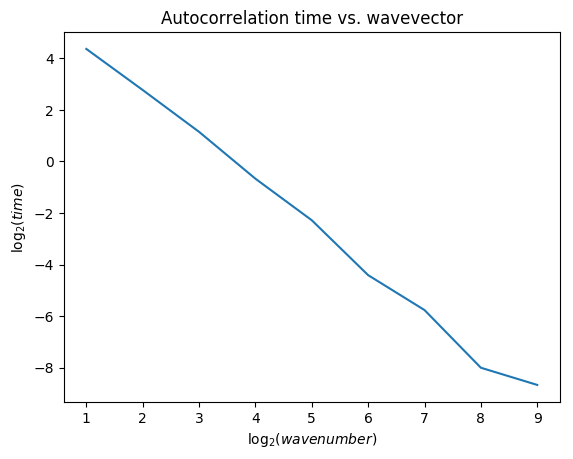

PyObject Text(0.5,1,u'Autocorrelation time vs. wavevector')

In [114]:
plot(1:9,log2.(decay_times))
xlabel(L"$\log_2(wavenumber)$")
ylabel(L"$\log_2(time)$")
title("Autocorrelation time vs. wavevector")

In [44]:
using CurveFit

In [45]:
curve_fit(LinearFit, 1:9, log2.(decay_times))

LoadError: [91mMethodError: no method matching curve_fit(::Type{CurveFit.LinearFit}, ::UnitRange{Int64}, ::Array{Float64,1})[0m
Closest candidates are:
  curve_fit([91m::Function[39m, ::AbstractArray, ::AbstractArray, [91m::Array{T,1} where T[39m, [91m::Any[39m; kwargs...) at /Applications/JuliaPro-0.6.0.1.app/Contents/Resources/pkgs-0.6.0.1/v0.6/LsqFit/src/curve_fit.jl:59
  curve_fit([91m::Function[39m, ::AbstractArray, ::AbstractArray, [91m::Array{T,2} where T[39m, [91m::Any[39m; kwargs...) at /Applications/JuliaPro-0.6.0.1.app/Contents/Resources/pkgs-0.6.0.1/v0.6/LsqFit/src/curve_fit.jl:78
  curve_fit([91m::Function[39m, ::AbstractArray, ::AbstractArray, [91m::Any[39m; kwargs...) at /Applications/JuliaPro-0.6.0.1.app/Contents/Resources/pkgs-0.6.0.1/v0.6/LsqFit/src/curve_fit.jl:43
  ...[39m